In [232]:
import numpy as np
import pandas as pd
import tensorflow as tf

## Dataset

In [206]:
dataset = pd.read_csv('diabetes_prediction_dataset.csv')

In [207]:
dataset

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [208]:
X = dataset.iloc[:, 0:-1].values
y = dataset.iloc[:, -1].values

In [209]:
pd.DataFrame(y, columns = ["diabetes"])

,diabetes
0,0
1,0
2,0
3,0
4,0
...,...
99995,0
99996,0
99997,0
99998,0


In [210]:
pd.DataFrame(X, columns = ["gender","age","hyptertension","heart_disease","smoking_history","bmi","HbA1c_level","blood_glucose_level"])

,gender,age,hyptertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
0,Female,80.0,0,1,never,25.19,6.6,140
1,Female,54.0,0,0,No Info,27.32,6.6,80
2,Male,28.0,0,0,never,27.32,5.7,158
3,Female,36.0,0,0,current,23.45,5.0,155
4,Male,76.0,1,1,current,20.14,4.8,155
...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90
99996,Female,2.0,0,0,No Info,17.37,6.5,100
99997,Male,66.0,0,0,former,27.83,5.7,155
99998,Female,24.0,0,0,never,35.42,4.0,100


In [211]:
X

array([['Female', 80.0, 0, ..., 25.19, 6.6, 140],
       ['Female', 54.0, 0, ..., 27.32, 6.6, 80],
       ['Male', 28.0, 0, ..., 27.32, 5.7, 158],
       ...,
       ['Male', 66.0, 0, ..., 27.83, 5.7, 155],
       ['Female', 24.0, 0, ..., 35.42, 4.0, 100],
       ['Female', 57.0, 0, ..., 22.43, 6.6, 90]], dtype=object)

In [212]:
y

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [213]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 0] = le.fit_transform(X[:, 0])

In [214]:
print(X)

[[0 80.0 0 ... 25.19 6.6 140]
 [0 54.0 0 ... 27.32 6.6 80]
 [1 28.0 0 ... 27.32 5.7 158]
 ...
 [1 66.0 0 ... 27.83 5.7 155]
 [0 24.0 0 ... 35.42 4.0 100]
 [0 57.0 0 ... 22.43 6.6 90]]


In [215]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [4])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

### Splitting the dataset into the Training set and Test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [216]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Building the Ann

### Initializing the Ann

In [217]:
ann = tf.keras.models.Sequential()

### Adding the input layer and the first hidden layer

In [218]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

### Adding the second hidden layer

In [219]:
#ann.add(tf.keras.layers.Dense(units=6, activation='relu'))
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

### Using Activation and Optimizer

In [220]:
ann.add(tf.keras.layers.Activation('softmax'))
opt = tf.keras.optimizers.Adam(learning_rate=0.01)
ann.compile(loss='categorical_crossentropy', optimizer='adam')

### Adding the output layer

In [221]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

## Training the ANN

### Compiling the ANN

In [222]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Training the ANN on the Training set

In [223]:
ann.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
2500/2500 [==============================] - 2s 745us/step - loss: 0.2386 - accuracy: 0.9412
Epoch 2/100
2500/2500 [==============================] - 2s 727us/step - loss: 0.1362 - accuracy: 0.9583
Epoch 3/100
2500/2500 [==============================] - 2s 734us/step - loss: 0.1237 - accuracy: 0.9591
Epoch 4/100
2500/2500 [==============================] - 2s 713us/step - loss: 0.1181 - accuracy: 0.9602
Epoch 5/100
2500/2500 [==============================] - 2s 743us/step - loss: 0.1148 - accuracy: 0.9606
Epoch 6/100
2500/2500 [==============================] - 2s 721us/step - loss: 0.1129 - accuracy: 0.9607
Epoch 7/100
2500/2500 [==============================] - 2s 723us/step - loss: 0.1116 - accuracy: 0.9611
Epoch 8/100
2500/2500 [==============================] - 2s 749us/step - loss: 0.1107 - accuracy: 0.9615
Epoch 9/100
2500/2500 [==============================] - 2s 716us/step - loss: 0.1098 - accuracy: 0.9617
Epoch 10/100
2500/2500 [==============================]

## Making the predictions and evaluating the model

### Predicting the Test set results

In [224]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

625/625 [==============================] - 0s 538us/step
[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


### Making the Confusion Matrix with Accuracy, Sensitivity, Specificity

In [238]:
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)
accuracy_score(y_test, y_pred)

total1=sum(sum(conf_matrix))
#####from confusion matrix calculate accuracy
accuracy1=(conf_matrix[0,0]+conf_matrix[1,1])/total1
print ('Accuracy : ', accuracy1)

sensitivity1 = conf_matrix[0,0]/(conf_matrix[0,0]+conf_matrix[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = conf_matrix[1,1]/(conf_matrix[1,0]+conf_matrix[1,1])
print('Specificity : ', specificity1)

[[18295     2]
 [  559  1144]]
Accuracy :  0.97195
Sensitivity :  0.9998906924632454
Specificity :  0.6717557251908397


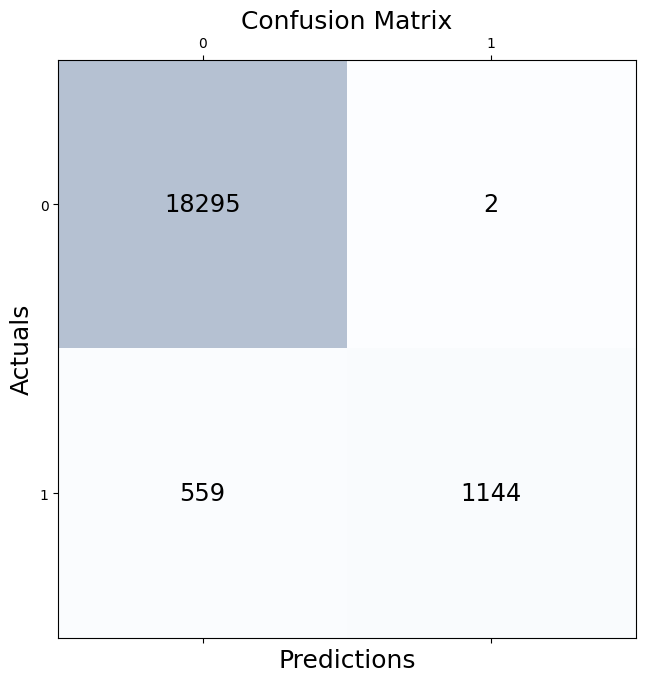

In [226]:
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()